In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heart = pd.read_csv("heart_disease.csv")

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [ ]:
heart.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [ ]:
# Checking the null values
heart.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
heart['oldpeak'].mode()[0]

0.0

In [ ]:
# Filling the null values
heart['oldpeak']=heart['oldpeak'].fillna(heart['oldpeak'].mode()[0])

###  Feature Engineering

**1.Handling categorical variables**                 
**2.Scaling numerical features (if needed)**                                 
we can use Label Encoding or One-hot Encoding for categorical variables.

In [ ]:
from sklearn import preprocessing

In [ ]:
# converting categorical variables to numeric
label_encoder = preprocessing.LabelEncoder()
heart['sex']= label_encoder.fit_transform(heart['sex'])
heart['cp']= label_encoder.fit_transform(heart['cp'])
heart['fbs']= label_encoder.fit_transform(heart['fbs'])
heart['restecg']= label_encoder.fit_transform(heart['restecg'])
heart['exang']= label_encoder.fit_transform(heart['exang'])
heart['slope']= label_encoder.fit_transform(heart['slope'])
heart['thal']= label_encoder.fit_transform(heart['thal'])

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4
905,56,1,2,170,0,0,0,123,1,2.5,0,0,4
906,56,1,2,144,208,1,2,105,2,0.0,0,2,4


### Handling outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7dbfa80f1090>,
 'caps': [<matplotlib.lines.Line2D at 0x7dbfaa70afe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dbfa80f0f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7dbfaa7085e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dbfaa709240>],
 'means': []}

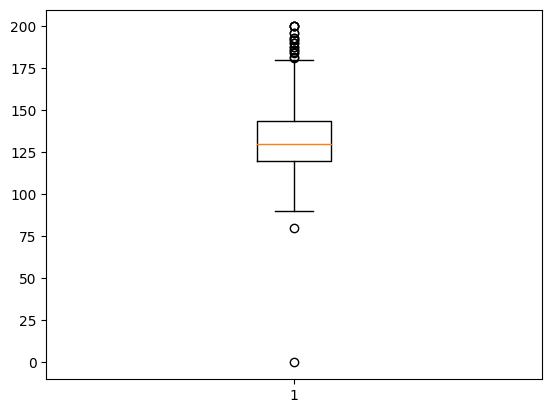

In [ ]:
plt.boxplot(heart['trestbps'])

In [ ]:
Q1 = heart['trestbps'].quantile(0.25)
Q3 = heart['trestbps'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
heart = heart[(heart['trestbps'] >= lower_bound) & (heart['trestbps'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7dbfa95e2020>,
 'caps': [<matplotlib.lines.Line2D at 0x7dbfa95e2380>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dbfaa4dbc40>],
 'medians': [<matplotlib.lines.Line2D at 0x7dbfa95e25f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dbfa95e2e60>],
 'means': []}

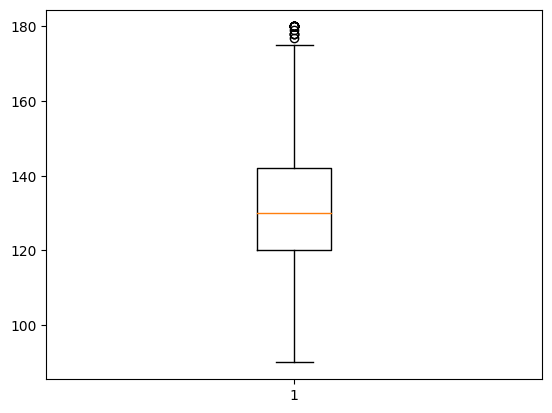

In [ ]:
plt.boxplot(heart['trestbps'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7dbfaaafd990>,
 'caps': [<matplotlib.lines.Line2D at 0x7dbfaaafd210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dbfaaafe6b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dbfa9896110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dbfa9897e50>],
 'means': []}

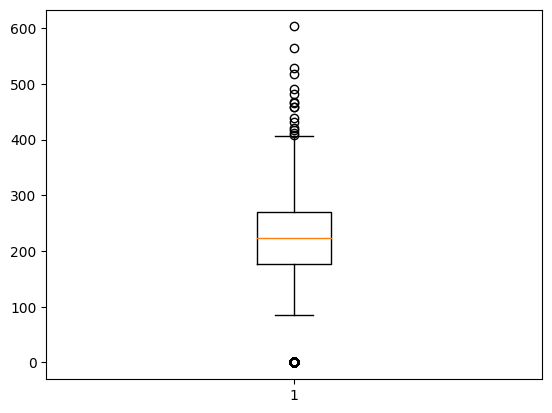

In [ ]:
plt.boxplot(heart['chol'])

In [ ]:
Q1 = heart['chol'].quantile(0.25)
Q3 = heart['chol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
heart = heart[(heart['chol'] >= lower_bound) & (heart['chol'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7dbfa9874dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7dbfa9877d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dbfa98762f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dbfa9875a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dbfa9875ab0>],
 'means': []}

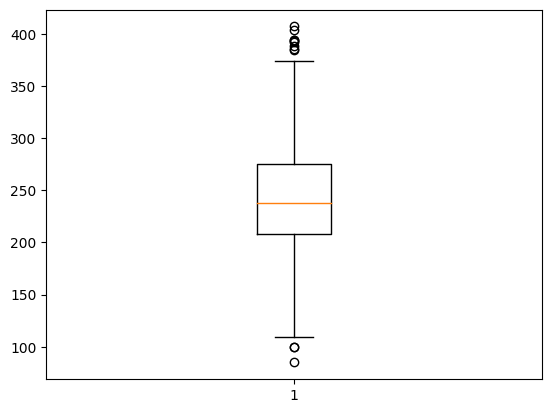

In [ ]:
plt.boxplot(heart['chol'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7dbfaa56b220>,
 'caps': [<matplotlib.lines.Line2D at 0x7dbfaa569f00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dbfaa56a5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dbfa960e650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dbfa9833370>],
 'means': []}

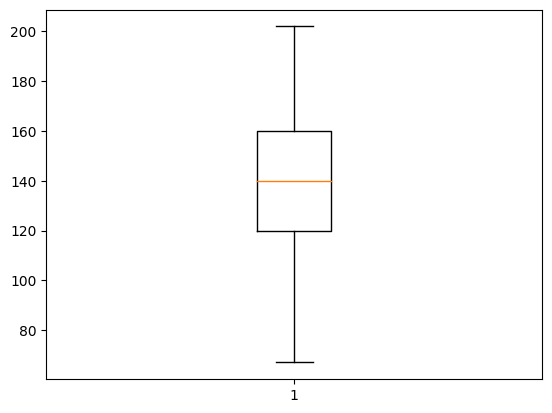

In [ ]:
plt.boxplot(heart['thalch'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7dbfa5c725c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7dbfa5c71360>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dbfa5c73df0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dbfa5c70f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dbfa5c70c70>],
 'means': []}

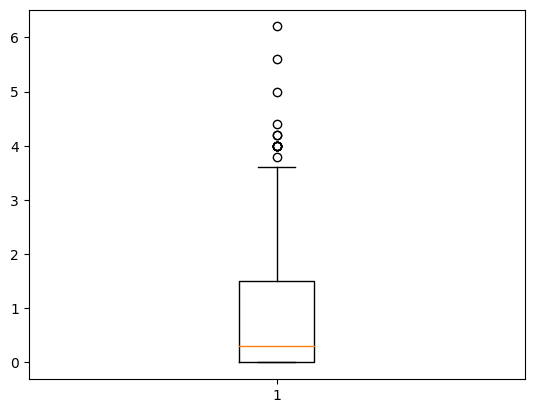

In [ ]:
plt.boxplot(heart['oldpeak'])

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,65,1,0,136,248,0,1,140,1,4.0,0,2,4
902,62,1,0,160,254,1,2,108,1,3.0,1,0,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4
906,56,1,2,144,208,1,2,105,2,0.0,0,2,4


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'thal'}>],
       [<Axes: title={'center': 'num'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

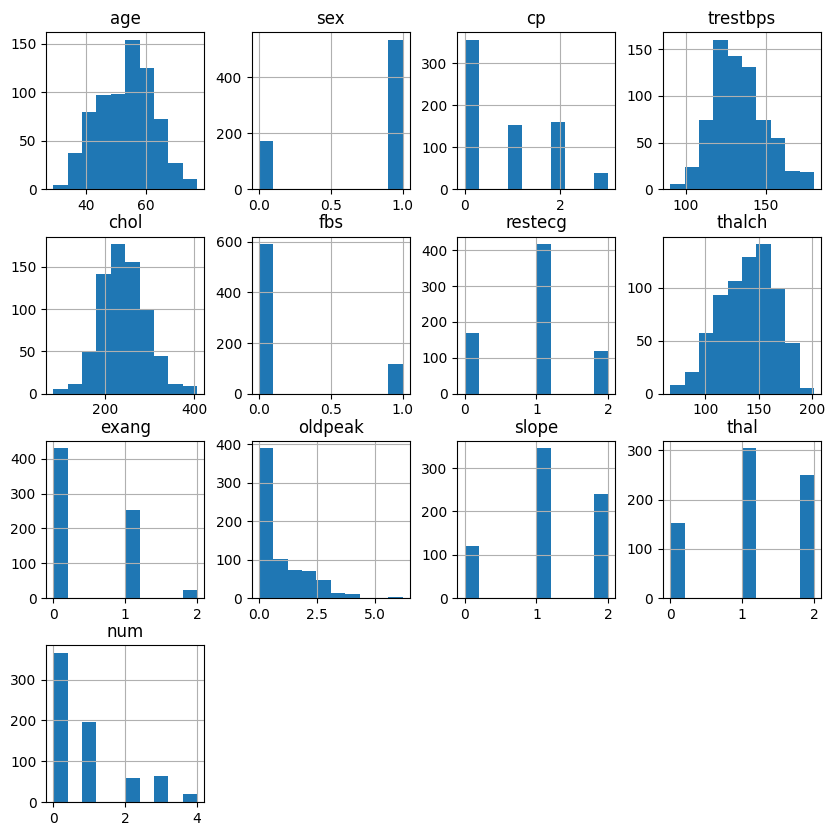

In [ ]:
# Histogram plot
heart.hist(figsize=(10,10))

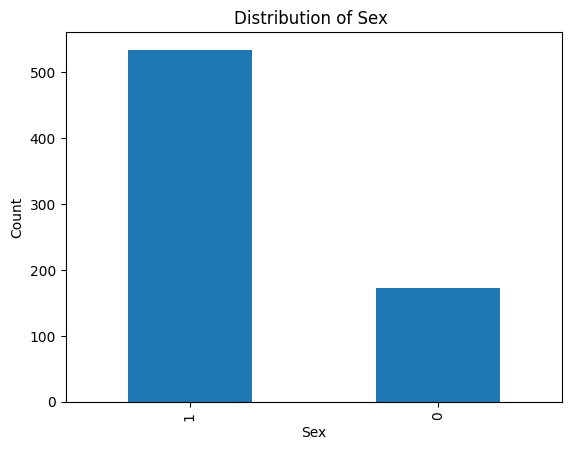

In [ ]:
heart['sex'].value_counts().plot(kind = "bar")
# Add labels
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex ')

# Show the plot
plt.show()

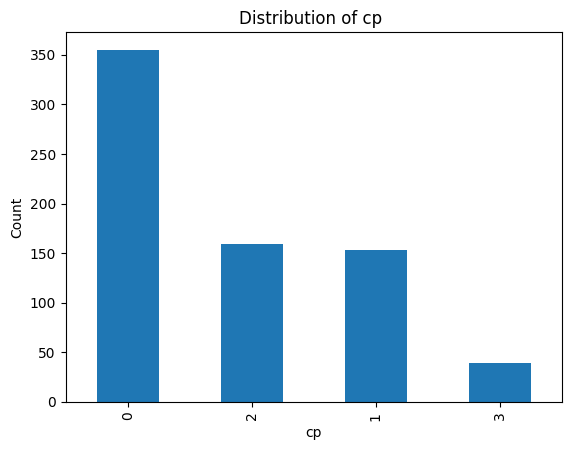

In [ ]:
heart['cp'].value_counts().plot(kind = "bar")
# Add labels
plt.xlabel('cp')
plt.ylabel('Count')
plt.title('Distribution of cp ')

# Show the plot
plt.show()

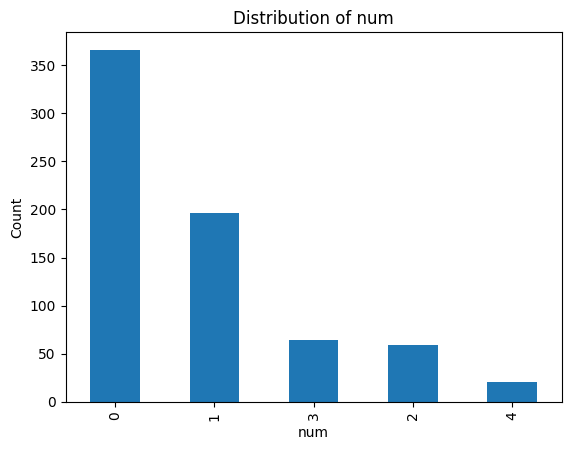

In [ ]:
heart['num'].value_counts().plot(kind = "bar")
# Add labels
plt.xlabel('num')
plt.ylabel('Count')
plt.title('Distribution of num')

# Show the plot
plt.show()

In [ ]:
#correlation between the variables
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.044096,-0.083605,0.257881,0.065498,0.213773,-0.050277,-0.333079,0.228271,0.218004,-0.025882,0.023384,0.356532
sex,0.044096,1.000000,-0.119467,0.043251,-0.090046,0.091367,0.031451,-0.146436,0.206304,0.109410,-0.051214,0.046181,0.245668
cp,-0.083605,-0.119467,1.000000,-0.011623,-0.125200,0.017477,-0.051490,0.270447,-0.341877,-0.219864,0.104391,-0.007864,-0.328535
trestbps,0.257881,0.043251,-0.011623,1.000000,0.138693,0.166410,0.073556,-0.153649,0.163006,0.160281,0.009604,0.019427,0.174571
chol,0.065498,-0.090046,-0.125200,0.138693,1.000000,0.034125,-0.063246,-0.004701,0.092428,0.048826,0.030304,0.005743,0.065966
fbs,0.213773,0.091367,0.017477,0.166410,0.034125,1.000000,0.036366,-0.084973,0.124585,-0.019189,-0.025996,-0.029733,0.139477
restecg,-0.050277,0.031451,-0.051490,0.073556,-0.063246,0.036366,1.000000,-0.183946,0.143594,-0.061738,-0.137016,-0.166033,-0.034588
thalch,-0.333079,-0.146436,0.270447,-0.153649,-0.004701,-0.084973,-0.183946,1.000000,-0.400167,-0.188287,0.210657,0.036187,-0.291723
exang,0.228271,0.206304,-0.341877,0.163006,0.092428,0.124585,0.143594,-0.400167,1.000000,0.299216,-0.153710,0.011996,0.363605
oldpeak,0.218004,0.109410,-0.219864,0.160281,0.048826,-0.019189,-0.061738,-0.188287,0.299216,1.000000,-0.214862,0.096382,0.487179


<Axes: >

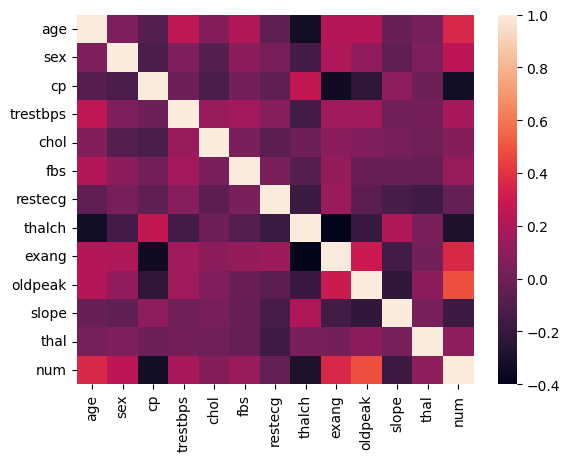

In [ ]:
sns.heatmap(heart.corr())

In [ ]:
heart=heart.drop(["age"],axis=1)

In [ ]:
x=heart.iloc[:,0:11]
y=heart['num']

In [ ]:
x

,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1,3,145,233,1,0,150,0,2.3,0,0
1,1,1,135,203,0,1,132,0,0.0,1,0
2,1,0,140,192,0,1,148,0,0.4,1,0
3,1,3,118,186,0,0,190,0,0.0,1,0
4,1,0,110,201,0,1,126,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
899,1,0,136,248,0,1,140,1,4.0,0,2
902,1,0,160,254,1,2,108,1,3.0,1,0
904,1,0,166,170,0,2,120,1,3.0,1,2
906,1,2,144,208,1,2,105,2,0.0,0,2


In [ ]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
899,4
902,4
904,4
906,4


In [ ]:
heart['num'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
colnames = list(heart.columns)
colnames

['sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(564, 11) (142, 11) (564,) (142,)


###  Building Decision Tree Classifier using Entropy Criteria

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

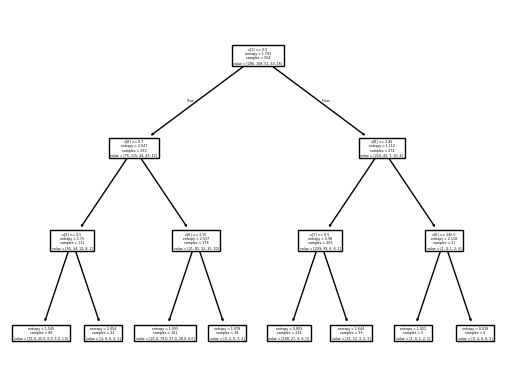

In [ ]:
tree.plot_tree(model);

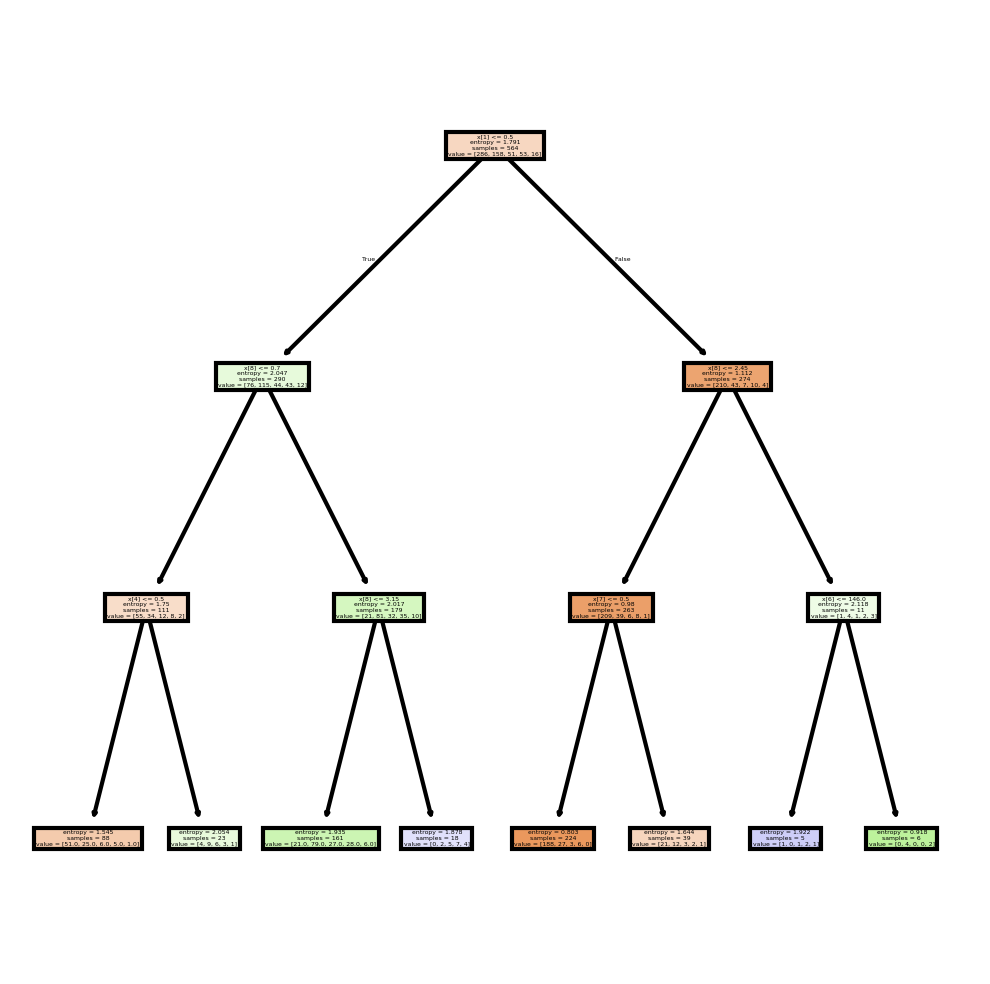

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model, filled = True);

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

,count
0,98
1,42
3,2


In [ ]:
pd.crosstab(y_test,preds)

col_0,0,1,3
num,,,
0,72,7,1
1,20,18,0
2,3,5,0
3,3,8,0
4,0,4,1


In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81        80
           1       0.43      0.47      0.45        38
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         5

    accuracy                           0.63       142
   macro avg       0.23      0.27      0.25       142
weighted avg       0.53      0.63      0.58       142



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
np.mean(preds==y_test)

0.6338028169014085

### Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

0.6338028169014085

In [ ]:
model1_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model1_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
pred=model1_gini.predict(x_test)
np.mean(preds==y_test)

0.6338028169014085

In [ ]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

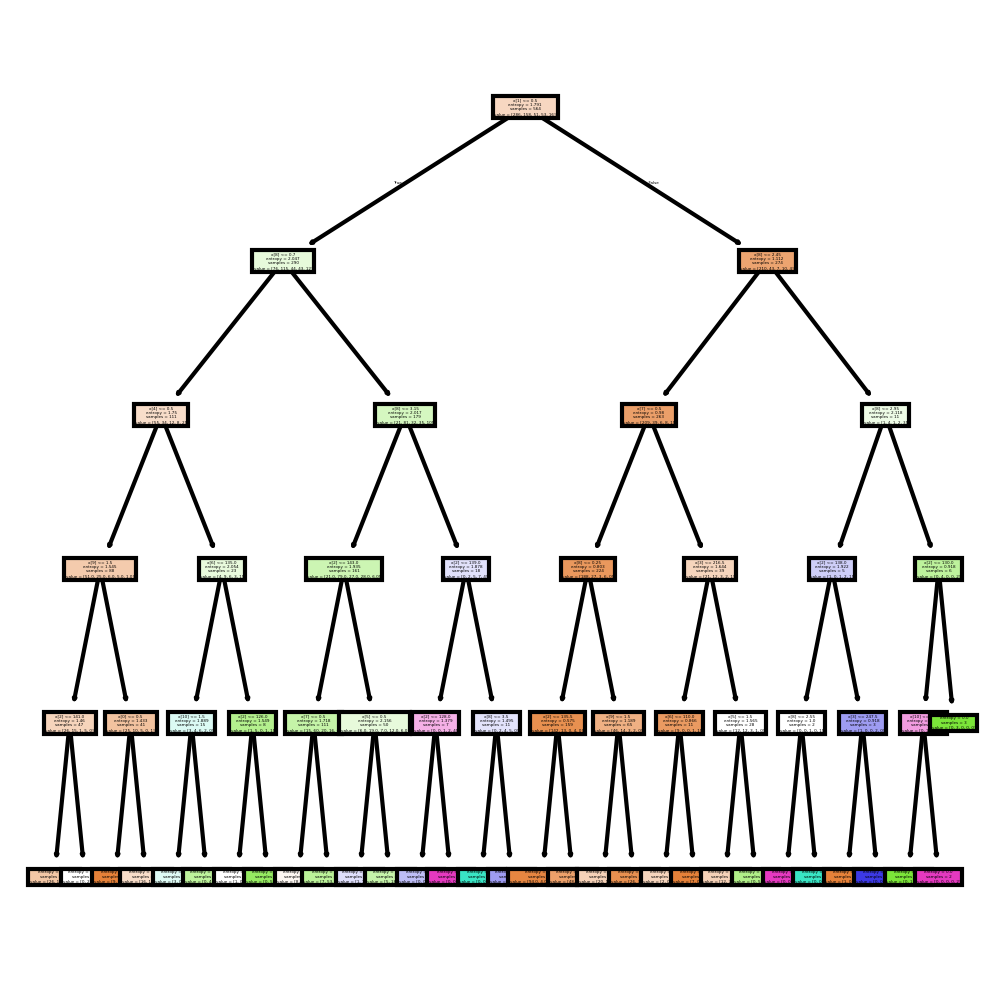

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1, filled = True);

In [ ]:
pred=model1.predict(x_test)
np.mean(preds==y_test)

0.6338028169014085

In [ ]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=7)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [ ]:
pred=model2.predict(x_test)
np.mean(preds==y_test)

0.6338028169014085

# **Interview Questions:**

**1.Common hyperparameters of decision trees and their effects:**                 
**max_depth:** Limits how deep the tree can grow, controlling overfitting. Shallow trees may underfit, while deep trees may overfit.                         
**min_samples_split**: The minimum number of samples required to split an internal node. Higher values prevent the tree from learning overly specific patterns (i.e., reduce overfitting).                  
**criterion:** The function used to measure the quality of a split (e.g., 'gini' for Gini impurity, 'entropy' for information gain). Different criteria can lead to slightly different trees.

**2.Difference between Label Encoding and One-hot Encoding**                                                                    Label Encoding: Converts categorical data into integer labels (e.g., 'Red', 'Blue', 'Green' → 0, 1, 2). It assumes an ordinal relationship which might not always be correct.                        
**One-hot Encoding:** Converts each category into a binary vector (e.g., 'Red', 'Blue', 'Green' → [1,0,0], [0,1,0], [0,0,1]). It is used for nominal categories without an inherent order.                     